# Deep neural networks

This assignment has many parts and we write a piece of code for each part. You can find each part in the following. We bring a summary of results in the begining.

In part a, b and c we are investigating different solvers and architectures and we attempt to compare these solvers and architectures. We compared SGD, GD with mini batch, adam and RMSprop optimizers. Based on the results we can see that for Minist data set and with specific hyper-paramters for each solver, training time for SGD is 37.7 seconds, for GD mini with minibatch, training time is 15.6 seconds, for RMSprop training time is 98 seconds. And if we compare the results we can see that GD is the most accurate algorithm. 

To compare architectures we have different choices. The first one is to use X nodes on one layer and train the model. Then devide these X nodes into N layers and train new model. In this case; however, the number of layers increase, the number of parameters won't increase dramatically (because the most effective factor on the number of paramters in this assignment is number of features. The effect of other layers is not very much). The other point is that when we increase number of layers we are increasing complexity of loss function (we are increasing the number of local minimums) therefore the chance of finding a local minimum with solution close to global minimum increases (these are based on what we experiance in the assignments). 

The second choice is to use architecture with one layer and X nodes and train it and compare it with N layer network with X node on each layer. We chose the first approch and base on the first approach deerper network works better with grater training time. 

Part d and e compare convergence of neural network over network. In d we have a 10 workers and master node which collects the gradients and avegrage it and broadcast it over network. In e we have specified connections over network and we do not have master node. The following figures shows the results of convergence of deep neural network for each part.

(d)
<img src="master_loss.png" width="400">
(e)
<img src="star_loss.png" width="400">

In part f we use dropout algorithm. Dropout function is implemented at each layer using `model.add(Dropout(0.1))`. In this algorithm, in forward propagation (just in forward propagation and not backward) we eliminate some nodes of the layer randomly. This algorithm is useful when we have a high variance model (practically large network and not enough data to train model). We can see the effect of this regularizer in the plot in the section. A similar effect can be generated using l1 regularizer with `model.add(Dense(10, input_shape = (784,), activity_regularizer = regularizers.l1(0.1)))`, which modifies the backward pass as well as the forward pass. But since dropout has a superior performance in NN training we omited l1 regularizer in this part. 
Last part is about using Batch Normalization. Using Batch Normalization accelerate training of the model. 

a) Train DNN using SGD and your choices of hyper-parameters, L, and $\{N_i\}_{i∈[L]}$. Report
the convergence rate on the training as well as the generalization performance. Feel free to change SGD to any other solver of your choice (give explanation for the choice). 

In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import time

Using TensorFlow backend.
/Users/shahab/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

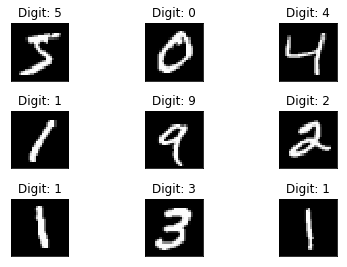

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [5]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [6]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.5759 - acc: 0.8172 - val_loss: 0.3476 - val_acc: 0.8992
Epoch 2/20
 - 2s - loss: 0.3300 - acc: 0.9069 - val_loss: 0.3031 - val_acc: 0.9112
Epoch 3/20
 - 2s - loss: 0.3002 - acc: 0.9161 - val_loss: 0.3020 - val_acc: 0.9134
Epoch 4/20
 - 2s - loss: 0.2792 - acc: 0.9200 - val_loss: 0.2685 - val_acc: 0.9241
Epoch 5/20
 - 2s - loss: 0.2668 - acc: 0.9236 - val_loss: 0.2711 - val_acc: 0.9194
Epoch 6/20
 - 2s - loss: 0.2534 - acc: 0.9269 - val_loss: 0.2686 - val_acc: 0.9202
Epoch 7/20
 - 2s - loss: 0.2428 - acc: 0.9291 - val_loss: 0.2532 - val_acc: 0.9268
Epoch 8/20
 - 2s - loss: 0.2375 - acc: 0.9310 - val_loss: 0.2757 - val_acc: 0.9174
Epoch 9/20
 - 2s - loss: 0.2335 - acc: 0.9313 - val_loss: 0.2607 - val_acc: 0.9224
Epoch 10/20
 - 2s - loss: 0.2275 - acc: 0.9333 - val_loss: 0.2412 - val_acc: 0.9279
Epoch 11/20
 - 2s - loss: 0.2217 - acc: 0.9340 - val_loss: 0.2550 - val_acc: 0.9246
Epoch 12/20
 - 2s - loss: 0.2182 - 

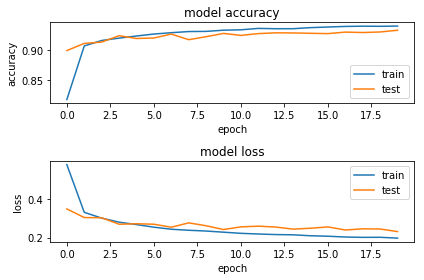

In [8]:
# training the model and saving metrics in history
start = time.time()
history = model.fit(X_train, Y_train,
          epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
# saving the model
save_dir = "./results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

In [9]:
print("Training time %.2f" %(end-start))

Training time 37.76


In [10]:
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.23067250587
Test Accuracy 0.9332



9332  classified correctly
668  classified incorrectly


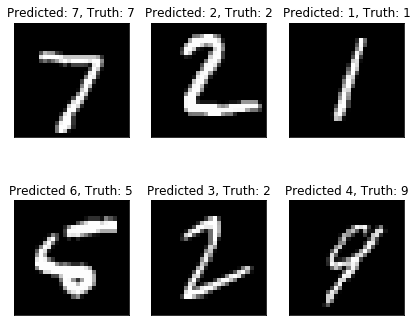

In [11]:
# load the model and create predictions on the test set
mnist_model = load_model(model_path)
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,6)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:3]):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:3]):
    plt.subplot(2,3,i+4)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

plt.show()

b) Repeat part a with mini-batch GD of your choice of the mini-batch size, retrain DNN,
and show the performance measures.

In [12]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer="adam")

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 1s - loss: 0.1690 - acc: 0.9499 - val_loss: 0.2164 - val_acc: 0.9387
Epoch 2/20
 - 1s - loss: 0.1656 - acc: 0.9508 - val_loss: 0.2128 - val_acc: 0.9406
Epoch 3/20
 - 1s - loss: 0.1633 - acc: 0.9508 - val_loss: 0.2121 - val_acc: 0.9407
Epoch 4/20
 - 1s - loss: 0.1614 - acc: 0.9516 - val_loss: 0.2145 - val_acc: 0.9379
Epoch 5/20
 - 1s - loss: 0.1602 - acc: 0.9520 - val_loss: 0.2126 - val_acc: 0.9385
Epoch 6/20
 - 1s - loss: 0.1588 - acc: 0.9522 - val_loss: 0.2135 - val_acc: 0.9387
Epoch 7/20
 - 1s - loss: 0.1572 - acc: 0.9532 - val_loss: 0.2121 - val_acc: 0.9395
Epoch 8/20
 - 1s - loss: 0.1565 - acc: 0.9532 - val_loss: 0.2139 - val_acc: 0.9387
Epoch 9/20
 - 1s - loss: 0.1546 - acc: 0.9538 - val_loss: 0.2204 - val_acc: 0.9393
Epoch 10/20
 - 1s - loss: 0.1540 - acc: 0.9537 - val_loss: 0.2137 - val_acc: 0.9397
Epoch 11/20
 - 1s - loss: 0.1528 - acc: 0.9541 - val_loss: 0.2153 - val_acc: 0.9400
Epoch 12/20
 - 1s - loss: 0.1520 - 

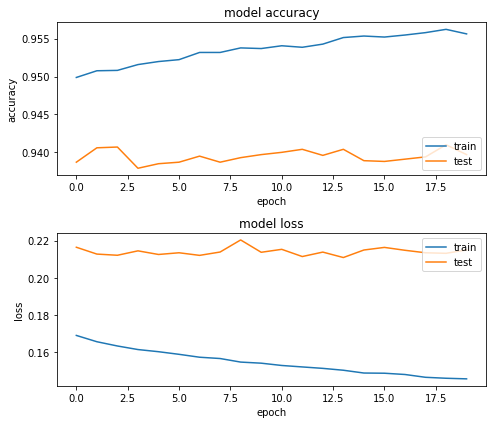

In [13]:
# training the model and saving metrics in history
start = time.time()
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
# saving the model
save_dir = "./results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

In [14]:
print("Training time %.2f" %(end-start))

Training time 15.21


In [84]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer="rmsprop")

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 19s - loss: 1.2087 - acc: 0.6486 - val_loss: 0.9910 - val_acc: 0.7118
Epoch 2/20
 - 4s - loss: 0.9132 - acc: 0.7315 - val_loss: 0.8299 - val_acc: 0.7573
Epoch 3/20
 - 5s - loss: 0.7961 - acc: 0.7643 - val_loss: 0.7558 - val_acc: 0.7775
Epoch 4/20
 - 5s - loss: 0.7342 - acc: 0.7799 - val_loss: 0.7314 - val_acc: 0.7752
Epoch 5/20
 - 4s - loss: 0.6974 - acc: 0.7901 - val_loss: 0.6769 - val_acc: 0.7952
Epoch 6/20
 - 4s - loss: 0.6726 - acc: 0.7964 - val_loss: 0.6533 - val_acc: 0.8103
Epoch 7/20
 - 5s - loss: 0.6548 - acc: 0.8031 - val_loss: 0.6428 - val_acc: 0.8117
Epoch 8/20
 - 4s - loss: 0.6408 - acc: 0.8121 - val_loss: 0.6350 - val_acc: 0.8164
Epoch 9/20
 - 4s - loss: 0.6276 - acc: 0.8160 - val_loss: 0.6183 - val_acc: 0.8258
Epoch 10/20
 - 4s - loss: 0.6169 - acc: 0.8218 - val_loss: 0.6044 - val_acc: 0.8302
Epoch 11/20
 - 4s - loss: 0.6062 - acc: 0.8257 - val_loss: 0.6268 - val_acc: 0.8198
Epoch 12/20
 - 4s - loss: 0.5960 -

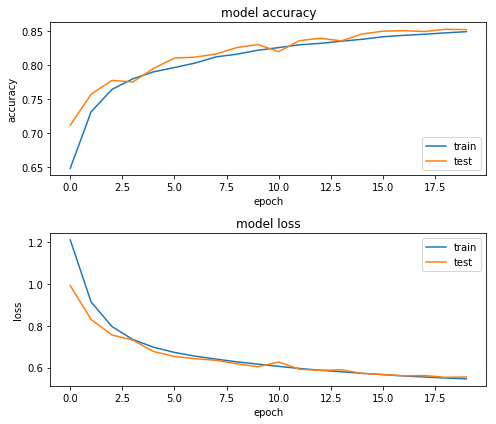

In [85]:
# training the model and saving metrics in history
start = time.time()
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
# saving the model
save_dir = "./results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

In [86]:
print("Training time %.2f" %(end-start))

Training time 98.34


c) Consider design of part a. Fix $\sum_i N_i$ Investigate shallower networks (smaller L) each having potentially more neurons versus deeper network each having fewer neurons per layer, and discuss pros and cons of these two DNN architectures.

In [15]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(5, input_shape=(784,)))
model.add(Activation('relu'))  

model.add(Dense(5))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [16]:
# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.9454 - acc: 0.6778 - val_loss: 0.6033 - val_acc: 0.8144
Epoch 2/20
 - 2s - loss: 0.5826 - acc: 0.8259 - val_loss: 0.5802 - val_acc: 0.8266
Epoch 3/20
 - 2s - loss: 0.5352 - acc: 0.8425 - val_loss: 0.5013 - val_acc: 0.8536
Epoch 4/20
 - 2s - loss: 0.5084 - acc: 0.8508 - val_loss: 0.4783 - val_acc: 0.8567
Epoch 5/20
 - 2s - loss: 0.4910 - acc: 0.8561 - val_loss: 0.4786 - val_acc: 0.8578
Epoch 6/20
 - 2s - loss: 0.4756 - acc: 0.8595 - val_loss: 0.4923 - val_acc: 0.8601
Epoch 7/20
 - 2s - loss: 0.4583 - acc: 0.8649 - val_loss: 0.4601 - val_acc: 0.8674
Epoch 8/20
 - 2s - loss: 0.4483 - acc: 0.8672 - val_loss: 0.4406 - val_acc: 0.8670
Epoch 9/20
 - 2s - loss: 0.4440 - acc: 0.8683 - val_loss: 0.4674 - val_acc: 0.8626
Epoch 10/20
 - 2s - loss: 0.4403 - acc: 0.8698 - val_loss: 0.4392 - val_acc: 0.8720
Epoch 11/20
 - 2s - loss: 0.4331 - acc: 0.8730 - val_loss: 0.4189 - val_acc: 0.8776
Epoch 12/20
 - 2s - loss: 0.4335 - 

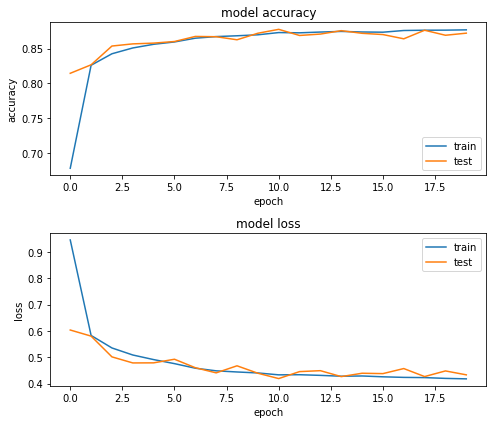

In [17]:
# training the model and saving metrics in history
start = time.time()
history = model.fit(X_train, Y_train,
          epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
# saving the model
save_dir = "./results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

In [18]:
print("Training time %.2f" %(end-start))

Training time 42.23


In [19]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(25, input_shape=(784,)))
model.add(Activation('relu'))  

model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.3485 - acc: 0.8975 - val_loss: 0.2261 - val_acc: 0.9348
Epoch 2/20
 - 2s - loss: 0.2045 - acc: 0.9395 - val_loss: 0.1698 - val_acc: 0.9505
Epoch 3/20
 - 2s - loss: 0.1655 - acc: 0.9507 - val_loss: 0.1482 - val_acc: 0.9548
Epoch 4/20
 - 2s - loss: 0.1433 - acc: 0.9578 - val_loss: 0.1399 - val_acc: 0.9579
Epoch 5/20
 - 2s - loss: 0.1294 - acc: 0.9607 - val_loss: 0.1403 - val_acc: 0.9576
Epoch 6/20
 - 2s - loss: 0.1189 - acc: 0.9642 - val_loss: 0.1334 - val_acc: 0.9604
Epoch 7/20
 - 2s - loss: 0.1118 - acc: 0.9656 - val_loss: 0.1398 - val_acc: 0.9595
Epoch 8/20
 - 2s - loss: 0.1040 - acc: 0.9680 - val_loss: 0.1270 - val_acc: 0.9629
Epoch 9/20
 - 2s - loss: 0.0999 - acc: 0.9694 - val_loss: 0.1281 - val_acc: 0.9627
Epoch 10/20
 - 2s - loss: 0.0943 - acc: 0.9711 - val_loss: 0.1327 - val_acc: 0.9604
Epoch 11/20
 - 2s - loss: 0.0909 - acc: 0.9718 - val_loss: 0.1269 - val_acc: 0.9645
Epoch 12/20
 - 2s - loss: 0.0879 - 

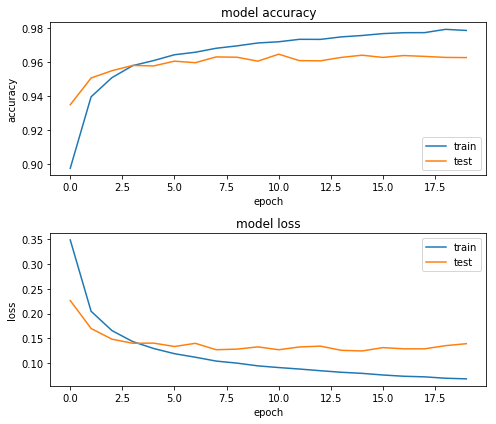

In [21]:
# training the model and saving metrics in history
start = time.time()
history = model.fit(X_train, Y_train,
          epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
# saving the model
save_dir = "./results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

In [22]:
print("Training time %.2f " %(end-start))

Training time 39.21 


f) To promote sparse solutions, you may use l1 regularization or a so-called dropout
technique. Explain how you incorporate each of these approaches in the training?

In [23]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(5, input_shape=(784,)))
model.add(Activation('relu'))  
model.add(Dropout(0.1))

model.add(Dense(5))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(5))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(5))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(10))
model.add(Activation('softmax'))

In [24]:
# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 1.7185 - acc: 0.3507 - val_loss: 1.2174 - val_acc: 0.5545
Epoch 2/20
 - 2s - loss: 1.4883 - acc: 0.4362 - val_loss: 1.1920 - val_acc: 0.5448
Epoch 3/20
 - 3s - loss: 1.4290 - acc: 0.4568 - val_loss: 1.0900 - val_acc: 0.5954
Epoch 4/20
 - 3s - loss: 1.4127 - acc: 0.4618 - val_loss: 1.1233 - val_acc: 0.5599
Epoch 5/20
 - 3s - loss: 1.4060 - acc: 0.4682 - val_loss: 1.1237 - val_acc: 0.5847
Epoch 6/20
 - 3s - loss: 1.3947 - acc: 0.4726 - val_loss: 1.0786 - val_acc: 0.6118
Epoch 7/20
 - 3s - loss: 1.3823 - acc: 0.4775 - val_loss: 1.0757 - val_acc: 0.6149
Epoch 8/20
 - 3s - loss: 1.3764 - acc: 0.4831 - val_loss: 1.0688 - val_acc: 0.6139
Epoch 9/20
 - 3s - loss: 1.3740 - acc: 0.4948 - val_loss: 1.0771 - val_acc: 0.6560
Epoch 10/20
 - 3s - loss: 1.3503 - acc: 0.5057 - val_loss: 1.0366 - val_acc: 0.6499
Epoch 11/20
 - 3s - loss: 1.3546 - acc: 0.5059 - val_loss: 1.1180 - val_acc: 0.5932
Epoch 12/20
 - 3s - loss: 1.3398 - 

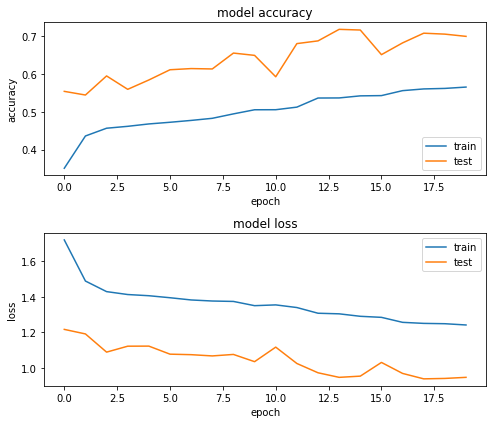

In [25]:
# training the model and saving metrics in history
start = time.time()
history = model.fit(X_train, Y_train,
          epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
# saving the model
save_dir = "./results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

In [26]:
print("Training time %.2f " %(end-start))

Training time 53.16 


g) Improving the smoothness of an optimization landscape may substantially improve the
convergence properties of first-order iterative algorithms. “Batch normalization” is a
relatively simple technique to smoothen the landscape [Santurkar-2018]. Using the
materials of the course, propose an alternative approach to improve the smoothness.
Provide numerical justification for the proposed approach.

In [27]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(5, input_shape=(784,)))
model.add(BatchNormalization())
model.add(Activation('relu'))  

model.add(Dense(5))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(5))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(5))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [28]:
# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.8735 - acc: 0.7161 - val_loss: 0.4865 - val_acc: 0.8680
Epoch 2/20
 - 6s - loss: 0.5626 - acc: 0.8331 - val_loss: 0.4257 - val_acc: 0.8765
Epoch 3/20
 - 6s - loss: 0.5316 - acc: 0.8394 - val_loss: 0.4147 - val_acc: 0.8787
Epoch 4/20
 - 6s - loss: 0.5116 - acc: 0.8459 - val_loss: 0.4119 - val_acc: 0.8814
Epoch 5/20
 - 6s - loss: 0.4962 - acc: 0.8517 - val_loss: 0.3906 - val_acc: 0.8848
Epoch 6/20
 - 6s - loss: 0.4885 - acc: 0.8527 - val_loss: 0.4810 - val_acc: 0.8690
Epoch 7/20
 - 6s - loss: 0.4860 - acc: 0.8541 - val_loss: 0.3890 - val_acc: 0.8818
Epoch 8/20
 - 6s - loss: 0.4815 - acc: 0.8567 - val_loss: 0.4188 - val_acc: 0.8748
Epoch 9/20
 - 6s - loss: 0.4719 - acc: 0.8581 - val_loss: 0.4004 - val_acc: 0.8824
Epoch 10/20
 - 6s - loss: 0.4729 - acc: 0.8577 - val_loss: 0.3709 - val_acc: 0.8926
Epoch 11/20
 - 6s - loss: 0.4693 - acc: 0.8599 - val_loss: 0.3843 - val_acc: 0.8877
Epoch 12/20
 - 6s - loss: 0.4678 - 

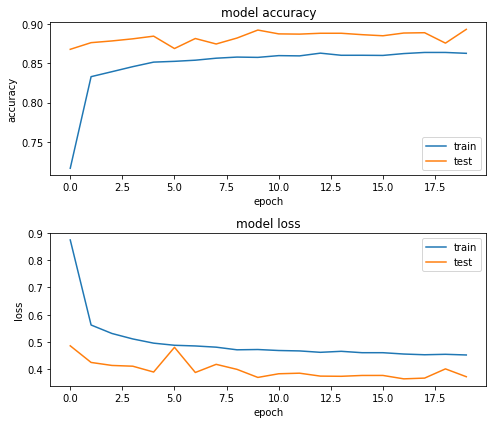

In [29]:
# training the model and saving metrics in history
start = time.time()
history = model.fit(X_train, Y_train,
          epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
# saving the model
save_dir = "./results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

plt.show()

In [30]:
print("Training time %.2f" %(end-start))

Training time 117.44


d) Split the dataset to 10 random disjoint subsets, each for one worker, and repeat part
a on master-worker computational graph.

In [31]:
print(X_train.shape, Y_train.shape)

(60000, 784) (60000, 10)


In [32]:
X_train_slices = np.zeros((10,6000,784))
Y_train_slices = np.zeros((10,6000,10))
for i in range(10):
    X_train_slices[i,0:6000,:] = X_train[i*6000:(i+1)*6000,:]
    Y_train_slices[i,0:6000,:] = Y_train[i*6000:(i+1)*6000,:]

In [52]:
models = []

initial_weight_1 = np.zeros((784,5))
initial_weight_2 = np.zeros((5,5))
initial_weight_3 = np.zeros((5,5))
initial_weight_4 = np.zeros((5,5))
initial_weight_5 = np.zeros((5,10))

for i in range(10):
    model_param = dict()
    model = Sequential()
    l1 = Dense(5, input_shape=(784,), activation='relu')
    model.add(l1)
    l1_weights = l1.get_weights()
    model_param['model'] = model
    model_param['l1_weight'] = l1_weights
    initial_weight_1 += l1_weights[0]

    l2 = Dense(5, activation = 'relu')
    model.add(l2)
    l2_weights = l2.get_weights()
    model_param['l2_weight'] = l2_weights
    initial_weight_2 += l2_weights[0]

    l3 = Dense(5, activation = 'relu')
    model.add(l3)
    l3_weights = l3.get_weights()
    model_param['l3_weight'] = l3_weights
    initial_weight_3 += l3_weights[0]

    l4 = Dense(5, activation = 'relu')
    model.add(l4)
    l4_weights = l4.get_weights()
    model_param['l4_weight'] = l4_weights
    initial_weight_4 += l4_weights[0]

    l5 = Dense(10, activation = 'softmax')
    model.add(l5)
    l5_weights = l5.get_weights()
    model_param['l5_weight'] = l5_weights
    initial_weight_5 += l5_weights[0]

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    history = model.fit(X_train_slices[i,0:6000,:], Y_train_slices[i,0:6000,:],
          epochs=1,
          verbose=2)
    models.append(model_param)

Epoch 1/1
 - 1s - loss: 1.9632 - acc: 0.2528
Epoch 1/1
 - 1s - loss: 1.9992 - acc: 0.2250
Epoch 1/1
 - 1s - loss: 2.1247 - acc: 0.1845
Epoch 1/1
 - 1s - loss: 2.1094 - acc: 0.2087
Epoch 1/1
 - 2s - loss: 2.1597 - acc: 0.1573
Epoch 1/1
 - 1s - loss: 2.0822 - acc: 0.2353
Epoch 1/1
 - 1s - loss: 1.9155 - acc: 0.2538
Epoch 1/1
 - 1s - loss: 1.8181 - acc: 0.3368
Epoch 1/1
 - 1s - loss: 2.0217 - acc: 0.2498
Epoch 1/1
 - 1s - loss: 2.0529 - acc: 0.2162


In [55]:
initial_weight_1 /= 10
initial_weight_2 /= 10
initial_weight_3 /= 10
initial_weight_4 /= 10
initial_weight_5 /= 10

In [61]:
bias = model_param['l1_weight'][1]
initial_p_1 = []
initial_p_1.append(initial_weight_1)
initial_p_1.append(bias)

initial_p_2 = []
initial_p_2.append(initial_weight_2)
initial_p_2.append(bias)

initial_p_3 = []
initial_p_3.append(initial_weight_3)
initial_p_3.append(bias)

initial_p_4 = []
initial_p_4.append(initial_weight_4)
initial_p_4.append(bias)

initial_p_5 = []
initial_p_5.append(initial_weight_5)
bias = model_param['l5_weight'][1]
initial_p_5.append(bias)

In [67]:
iteration_no = 20
loss = np.zeros((10,iteration_no))
for i in range(iteration_no):
    new_weights_1 = np.zeros((784,5))
    new_weights_2 = np.zeros((5,5))
    new_weights_3 = np.zeros((5,5))
    new_weights_4 = np.zeros((5,5))
    new_weights_5 = np.zeros(model_param['l5_weight'][0].shape)
    bias_1 = np.zeros(model_param['l1_weight'][1].shape)
    bias_2 = np.zeros(model_param['l2_weight'][1].shape)
    bias_3 = np.zeros(model_param['l3_weight'][1].shape)
    bias_4 = np.zeros(model_param['l4_weight'][1].shape)
    bias_5 = np.zeros(model_param['l5_weight'][1].shape)
    for j in range(10):
        model = Sequential()
        l1 = Dense(5, input_shape=(784,), activation='relu')
        model.add(l1)
        l1.set_weights(initial_p_1)

        l2 = Dense(5, activation = 'relu')
        model.add(l2)
        l2.set_weights(initial_p_2)
        
        l3 = Dense(5, activation = 'relu')
        model.add(l3)
        l3.set_weights(initial_p_3)

        l4 = Dense(5, activation = 'relu')
        model.add(l4)
        l4.set_weights(initial_p_4)

        l5 = Dense(10, activation = 'softmax')
        model.add(l5)
        l5.set_weights(initial_p_5)

        # compiling the sequential model
        sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

        print("worker ",j, "iteration ", i)
        history = model.fit(X_train_slices[j,0:6000,:], Y_train_slices[j,0:6000,:],
              epochs=1,
              verbose=2)
        loss[j,i] = history.history['loss'][0]
        new_weights_1 += l1.get_weights()[0]
        new_weights_2 += l2.get_weights()[0]
        new_weights_3 += l3.get_weights()[0]
        new_weights_4 += l4.get_weights()[0]
        new_weights_5 += l5.get_weights()[0]
        bias_1 += l1.get_weights()[1]
        bias_2 += l2.get_weights()[1]
        bias_3 += l3.get_weights()[1]
        bias_4 += l4.get_weights()[1]
        bias_5 += l5.get_weights()[1]
    initial_p_1 = []
    initial_p_1.append(new_weights_1/10)
    initial_p_1.append(bias_1/10)
    
    initial_p_2 = []
    initial_p_2.append(new_weights_2/10)
    initial_p_2.append(bias_2/10)
    
    initial_p_3 = []
    initial_p_3.append(new_weights_3/10)
    initial_p_3.append(bias_3/10)
    
    initial_p_4 = []
    initial_p_4.append(new_weights_4/10)
    initial_p_4.append(bias_4/10)
    
    initial_p_5 = []
    initial_p_5.append(new_weights_5/10)
    initial_p_5.append(bias_5/10)

worker  0 iteration  0
Epoch 1/1
 - 3s - loss: 2.2007 - acc: 0.1597
worker  1 iteration  0
Epoch 1/1
 - 3s - loss: 2.1971 - acc: 0.1757
worker  2 iteration  0
Epoch 1/1
 - 3s - loss: 2.2151 - acc: 0.1660
worker  3 iteration  0
Epoch 1/1
 - 3s - loss: 2.2010 - acc: 0.1872
worker  4 iteration  0
Epoch 1/1
 - 3s - loss: 2.2034 - acc: 0.1753
worker  5 iteration  0
Epoch 1/1
 - 3s - loss: 2.2171 - acc: 0.1632
worker  6 iteration  0
Epoch 1/1
 - 3s - loss: 2.2027 - acc: 0.1750
worker  7 iteration  0
Epoch 1/1
 - 3s - loss: 2.2141 - acc: 0.1723
worker  8 iteration  0
Epoch 1/1
 - 3s - loss: 2.2091 - acc: 0.1675
worker  9 iteration  0
Epoch 1/1
 - 3s - loss: 2.1978 - acc: 0.1582
worker  0 iteration  1
Epoch 1/1
 - 3s - loss: 1.6281 - acc: 0.3293
worker  1 iteration  1
Epoch 1/1
 - 3s - loss: 1.6420 - acc: 0.3292
worker  2 iteration  1
Epoch 1/1
 - 3s - loss: 1.6689 - acc: 0.3262
worker  3 iteration  1
Epoch 1/1
 - 3s - loss: 1.6629 - acc: 0.3267
worker  4 iteration  1
Epoch 1/1
 - 3s - loss: 1

Epoch 1/1
 - 5s - loss: 0.5851 - acc: 0.8317
worker  1 iteration  12
Epoch 1/1
 - 5s - loss: 0.6472 - acc: 0.8127
worker  2 iteration  12
Epoch 1/1
 - 5s - loss: 0.6776 - acc: 0.7970
worker  3 iteration  12
Epoch 1/1
 - 5s - loss: 0.6143 - acc: 0.8260
worker  4 iteration  12
Epoch 1/1
 - 6s - loss: 0.6430 - acc: 0.8137
worker  5 iteration  12
Epoch 1/1
 - 5s - loss: 0.6312 - acc: 0.8192
worker  6 iteration  12
Epoch 1/1
 - 5s - loss: 0.6702 - acc: 0.8043
worker  7 iteration  12
Epoch 1/1
 - 6s - loss: 0.6472 - acc: 0.8080
worker  8 iteration  12
Epoch 1/1
 - 5s - loss: 0.6637 - acc: 0.8060
worker  9 iteration  12
Epoch 1/1
 - 6s - loss: 0.5652 - acc: 0.8412
worker  0 iteration  13
Epoch 1/1
 - 6s - loss: 0.5788 - acc: 0.8365
worker  1 iteration  13
Epoch 1/1
 - 5s - loss: 0.6381 - acc: 0.8105
worker  2 iteration  13
Epoch 1/1
 - 6s - loss: 0.6637 - acc: 0.7963
worker  3 iteration  13
Epoch 1/1
 - 6s - loss: 0.6120 - acc: 0.8235
worker  4 iteration  13
Epoch 1/1
 - 6s - loss: 0.6388 - a

In [68]:
print(type(l1.get_weights()[0]))
print(l1.get_weights()[0])
print(l1.get_weights()[0].shape)
print(history.history['loss'])

<class 'numpy.ndarray'>
[[-0.01633359 -0.02304629 -0.02223742  0.00015803 -0.0272914 ]
 [-0.01710819  0.01235947  0.00387749 -0.01477406 -0.02688115]
 [ 0.03199181  0.02214015  0.00845784 -0.00110491 -0.01754218]
 ..., 
 [ 0.01660231 -0.00829871  0.00305511 -0.02046305 -0.00173992]
 [ 0.00842441 -0.01422198 -0.01221199 -0.00740915  0.01184294]
 [-0.0076266  -0.01855363 -0.00848916  0.01070411 -0.01056561]]
(784, 5)
[0.52701399604479471]


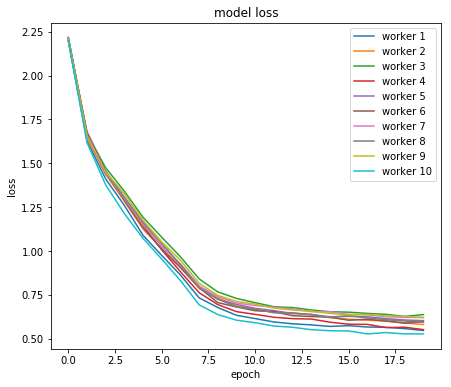

In [72]:
# plotting the metrics
fig = plt.figure()
plt.subplot(1,1,1)
plt.plot(loss[0,:])
plt.plot(loss[1,:])
plt.plot(loss[2,:])
plt.plot(loss[3,:])
plt.plot(loss[4,:])
plt.plot(loss[5,:])
plt.plot(loss[6,:])
plt.plot(loss[7,:])
plt.plot(loss[8,:])
plt.plot(loss[9,:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['worker 1', 'worker 2', 'worker 3', 'worker 4', 'worker 5', 'worker 6'\
           , 'worker 7', 'worker 8', 'worker 9', 'worker 10'], loc='upper right')
plt.show()

e) Consider a two-star topology with communication graph (1,2,3,4)-5-6-(7,8,9,10). Repeat part a using your choice of distributed optimization solver. You can add communication-efficiency to the iterations.

In [79]:
models = []

initial_weight_11 = np.zeros((784,5))
initial_weight_12 = np.zeros((5,5))
initial_weight_13 = np.zeros((5,5))
initial_weight_14 = np.zeros((5,5))
initial_weight_15 = np.zeros((5,10))

initial_weight_21 = np.zeros((784,5))
initial_weight_22 = np.zeros((5,5))
initial_weight_23 = np.zeros((5,5))
initial_weight_24 = np.zeros((5,5))
initial_weight_25 = np.zeros((5,10))

initial_weight_31 = np.zeros((784,5))
initial_weight_32 = np.zeros((5,5))
initial_weight_33 = np.zeros((5,5))
initial_weight_34 = np.zeros((5,5))
initial_weight_35 = np.zeros((5,10))

initial_weight_41 = np.zeros((784,5))
initial_weight_42 = np.zeros((5,5))
initial_weight_43 = np.zeros((5,5))
initial_weight_44 = np.zeros((5,5))
initial_weight_45 = np.zeros((5,10))

initial_weight_51 = np.zeros((784,5))
initial_weight_52 = np.zeros((5,5))
initial_weight_53 = np.zeros((5,5))
initial_weight_54 = np.zeros((5,5))
initial_weight_55 = np.zeros((5,10))

initial_weight_61 = np.zeros((784,5))
initial_weight_62 = np.zeros((5,5))
initial_weight_63 = np.zeros((5,5))
initial_weight_64 = np.zeros((5,5))
initial_weight_65 = np.zeros((5,10))

initial_weight_71 = np.zeros((784,5))
initial_weight_72 = np.zeros((5,5))
initial_weight_73 = np.zeros((5,5))
initial_weight_74 = np.zeros((5,5))
initial_weight_75 = np.zeros((5,10))

initial_weight_81 = np.zeros((784,5))
initial_weight_82 = np.zeros((5,5))
initial_weight_83 = np.zeros((5,5))
initial_weight_84 = np.zeros((5,5))
initial_weight_85 = np.zeros((5,10))

initial_weight_91 = np.zeros((784,5))
initial_weight_92 = np.zeros((5,5))
initial_weight_93 = np.zeros((5,5))
initial_weight_94 = np.zeros((5,5))
initial_weight_95 = np.zeros((5,10))

initial_weight_101 = np.zeros((784,5))
initial_weight_102 = np.zeros((5,5))
initial_weight_103 = np.zeros((5,5))
initial_weight_104 = np.zeros((5,5))
initial_weight_105 = np.zeros((5,10))

#######worker 1#########
model1 = Sequential()

l11 = Dense(5, input_shape=(784,), activation='relu')
model1.add(l11)
l11_weights = l11.get_weights()
initial_weight_11 += l11_weights[0]

l12 = Dense(5, activation = 'relu')
model1.add(l12)
l12_weights = l12.get_weights()
initial_weight_12 += l12_weights[0]

l13 = Dense(5, activation = 'relu')
model1.add(l13)
l13_weights = l13.get_weights()
initial_weight_13 += l13_weights[0]

l14 = Dense(5, activation = 'relu')
model1.add(l14)
l14_weights = l14.get_weights()
initial_weight_14 += l14_weights[0]

l15 = Dense(10, activation = 'softmax')
model1.add(l15)
l15_weights = l15.get_weights()
initial_weight_15 += l15_weights[0]

# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model1.fit(X_train_slices[0,0:6000,:], Y_train_slices[0,0:6000,:],
      epochs=1,
      verbose=2)

#######worker 2#########
model2 = Sequential()

l21 = Dense(5, input_shape=(784,), activation='relu')
model2.add(l21)
l21_weights = l21.get_weights()
initial_weight_21 += l21_weights[0]

l22 = Dense(5, activation = 'relu')
model2.add(l22)
l22_weights = l22.get_weights()
initial_weight_22 += l22_weights[0]

l23 = Dense(5, activation = 'relu')
model2.add(l23)
l23_weights = l23.get_weights()
initial_weight_23 += l23_weights[0]

l24 = Dense(5, activation = 'relu')
model2.add(l24)
l24_weights = l24.get_weights()
initial_weight_24 += l24_weights[0]

l25 = Dense(10, activation = 'softmax')
model2.add(l25)
l25_weights = l25.get_weights()
initial_weight_25 += l25_weights[0]

# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model2.fit(X_train_slices[1,0:6000,:], Y_train_slices[1,0:6000,:],
      epochs=1,
      verbose=2)

#######worker 3#########
model3 = Sequential()

l31 = Dense(5, input_shape=(784,), activation='relu')
model3.add(l31)
l31_weights = l31.get_weights()
initial_weight_31 += l31_weights[0]

l32 = Dense(5, activation = 'relu')
model3.add(l32)
l32_weights = l32.get_weights()
initial_weight_32 += l32_weights[0]

l33 = Dense(5, activation = 'relu')
model3.add(l33)
l33_weights = l33.get_weights()
initial_weight_33 += l33_weights[0]

l34 = Dense(5, activation = 'relu')
model3.add(l34)
l34_weights = l34.get_weights()
initial_weight_34 += l34_weights[0]

l35 = Dense(10, activation = 'softmax')
model3.add(l35)
l35_weights = l35.get_weights()
initial_weight_35 += l35_weights[0]

# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model3.fit(X_train_slices[2,0:6000,:], Y_train_slices[2,0:6000,:],
      epochs=1,
      verbose=2)

#######worker 4#########
model4 = Sequential()

l41 = Dense(5, input_shape=(784,), activation='relu')
model4.add(l41)
l41_weights = l41.get_weights()
initial_weight_41 += l41_weights[0]

l42 = Dense(5, activation = 'relu')
model4.add(l42)
l42_weights = l42.get_weights()
initial_weight_42 += l42_weights[0]

l43 = Dense(5, activation = 'relu')
model4.add(l43)
l43_weights = l43.get_weights()
initial_weight_43 += l43_weights[0]

l44 = Dense(5, activation = 'relu')
model4.add(l44)
l44_weights = l44.get_weights()
initial_weight_44 += l44_weights[0]

l45 = Dense(10, activation = 'softmax')
model4.add(l45)
l45_weights = l45.get_weights()
initial_weight_45 += l45_weights[0]

# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model4.fit(X_train_slices[3,0:6000,:], Y_train_slices[3,0:6000,:],
      epochs=1,
      verbose=2)

#######worker 5#########
model5 = Sequential()

l51 = Dense(5, input_shape=(784,), activation='relu')
model5.add(l51)
l51_weights = l51.get_weights()
initial_weight_51 += l51_weights[0]

l52 = Dense(5, activation = 'relu')
model5.add(l52)
l52_weights = l52.get_weights()
initial_weight_52 += l52_weights[0]

l53 = Dense(5, activation = 'relu')
model5.add(l53)
l53_weights = l53.get_weights()
initial_weight_53 += l53_weights[0]

l54 = Dense(5, activation = 'relu')
model5.add(l54)
l54_weights = l54.get_weights()
initial_weight_54 += l54_weights[0]

l55 = Dense(10, activation = 'softmax')
model5.add(l55)
l55_weights = l55.get_weights()
initial_weight_55 += l55_weights[0]

# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model5.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model5.fit(X_train_slices[4,0:6000,:], Y_train_slices[4,0:6000,:],
      epochs=1,
      verbose=2)

#######worker 6#########
model6 = Sequential()

l61 = Dense(5, input_shape=(784,), activation='relu')
model6.add(l61)
l61_weights = l61.get_weights()
initial_weight_61 += l61_weights[0]

l62 = Dense(5, activation = 'relu')
model6.add(l62)
l62_weights = l62.get_weights()
initial_weight_62 += l62_weights[0]

l63 = Dense(5, activation = 'relu')
model6.add(l63)
l63_weights = l63.get_weights()
initial_weight_63 += l63_weights[0]

l64 = Dense(5, activation = 'relu')
model6.add(l64)
l64_weights = l64.get_weights()
initial_weight_64 += l64_weights[0]

l65 = Dense(10, activation = 'softmax')
model6.add(l65)
l65_weights = l65.get_weights()
initial_weight_65 += l65_weights[0]

# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model6.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model6.fit(X_train_slices[5,0:6000,:], Y_train_slices[5,0:6000,:],
      epochs=1,
      verbose=2)

#######worker 7#########
model7 = Sequential()

l71 = Dense(5, input_shape=(784,), activation='relu')
model7.add(l71)
l71_weights = l71.get_weights()
initial_weight_71 += l71_weights[0]

l72 = Dense(5, activation = 'relu')
model7.add(l72)
l72_weights = l72.get_weights()
initial_weight_72 += l72_weights[0]

l73 = Dense(5, activation = 'relu')
model7.add(l73)
l73_weights = l73.get_weights()
initial_weight_73 += l73_weights[0]

l74 = Dense(5, activation = 'relu')
model7.add(l74)
l74_weights = l74.get_weights()
initial_weight_74 += l74_weights[0]

l75 = Dense(10, activation = 'softmax')
model7.add(l75)
l75_weights = l75.get_weights()
initial_weight_75 += l75_weights[0]

# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model7.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model7.fit(X_train_slices[6,0:6000,:], Y_train_slices[6,0:6000,:],
      epochs=1,
      verbose=2)

#######worker 8#########
model8 = Sequential()

l81 = Dense(5, input_shape=(784,), activation='relu')
model8.add(l81)
l81_weights = l81.get_weights()
initial_weight_81 += l81_weights[0]

l82 = Dense(5, activation = 'relu')
model8.add(l82)
l82_weights = l82.get_weights()
initial_weight_82 += l82_weights[0]

l83 = Dense(5, activation = 'relu')
model8.add(l83)
l83_weights = l83.get_weights()
initial_weight_83 += l83_weights[0]

l84 = Dense(5, activation = 'relu')
model8.add(l84)
l84_weights = l84.get_weights()
initial_weight_84 += l84_weights[0]

l85 = Dense(10, activation = 'softmax')
model8.add(l85)
l85_weights = l85.get_weights()
initial_weight_85 += l85_weights[0]

# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model8.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model8.fit(X_train_slices[7,0:6000,:], Y_train_slices[7,0:6000,:],
      epochs=1,
      verbose=2)

#######worker 9#########
model9 = Sequential()

l91 = Dense(5, input_shape=(784,), activation='relu')
model9.add(l91)
l91_weights = l91.get_weights()
initial_weight_91 += l91_weights[0]

l92 = Dense(5, activation = 'relu')
model9.add(l92)
l92_weights = l92.get_weights()
initial_weight_92 += l92_weights[0]

l93 = Dense(5, activation = 'relu')
model9.add(l93)
l93_weights = l93.get_weights()
initial_weight_93 += l93_weights[0]

l94 = Dense(5, activation = 'relu')
model9.add(l94)
l94_weights = l94.get_weights()
initial_weight_94 += l94_weights[0]

l95 = Dense(10, activation = 'softmax')
model9.add(l95)
l95_weights = l95.get_weights()
initial_weight_95 += l95_weights[0]

# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model9.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model9.fit(X_train_slices[8,0:6000,:], Y_train_slices[8,0:6000,:],
      epochs=1,
      verbose=2)

#######worker 10#########
model10 = Sequential()

l101 = Dense(5, input_shape=(784,), activation='relu')
model10.add(l101)
l101_weights = l101.get_weights()
initial_weight_101 += l101_weights[0]

l102 = Dense(5, activation = 'relu')
model10.add(l102)
l102_weights = l102.get_weights()
initial_weight_102 += l102_weights[0]

l103 = Dense(5, activation = 'relu')
model10.add(l103)
l103_weights = l103.get_weights()
initial_weight_103 += l103_weights[0]

l104 = Dense(5, activation = 'relu')
model10.add(l104)
l104_weights = l104.get_weights()
initial_weight_104 += l104_weights[0]

l105 = Dense(10, activation = 'softmax')
model10.add(l105)
l105_weights = l105.get_weights()
initial_weight_105 += l105_weights[0]

# compiling the sequential model
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model10.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model10.fit(X_train_slices[9,0:6000,:], Y_train_slices[9,0:6000,:],
      epochs=1,
      verbose=2)

Epoch 1/1
 - 8s - loss: 1.9940 - acc: 0.2367
Epoch 1/1
 - 9s - loss: 1.9365 - acc: 0.2823
Epoch 1/1
 - 9s - loss: 2.0956 - acc: 0.2153
Epoch 1/1
 - 8s - loss: 2.0140 - acc: 0.2187
Epoch 1/1
 - 8s - loss: 2.0429 - acc: 0.2197
Epoch 1/1
 - 8s - loss: 2.0396 - acc: 0.2368
Epoch 1/1
 - 8s - loss: 2.0676 - acc: 0.2528
Epoch 1/1
 - 4250s - loss: 1.8643 - acc: 0.3217
Epoch 1/1
 - 9s - loss: 2.2016 - acc: 0.1603
Epoch 1/1
 - 9s - loss: 2.1275 - acc: 0.2018


In [80]:
#worker 1
bias = model_param['l1_weight'][1]
initial_p_11 = []
initial_p_11.append(initial_weight_11)
initial_p_11.append(bias)

initial_p_12 = []
initial_p_12.append(initial_weight_12)
initial_p_12.append(bias)

initial_p_13 = []
initial_p_13.append(initial_weight_13)
initial_p_13.append(bias)

initial_p_14 = []
initial_p_14.append(initial_weight_14)
initial_p_14.append(bias)

initial_p_15 = []
initial_p_15.append(initial_weight_15)
bias = model_param['l5_weight'][1]
initial_p_15.append(bias)

#worker 2
bias = model_param['l1_weight'][1]
initial_p_21 = []
initial_p_21.append(initial_weight_21)
initial_p_21.append(bias)

initial_p_22 = []
initial_p_22.append(initial_weight_22)
initial_p_22.append(bias)

initial_p_23 = []
initial_p_23.append(initial_weight_23)
initial_p_23.append(bias)

initial_p_24 = []
initial_p_24.append(initial_weight_24)
initial_p_24.append(bias)

initial_p_25 = []
initial_p_25.append(initial_weight_25)
bias = model_param['l5_weight'][1]
initial_p_25.append(bias)

#worker 3
bias = model_param['l1_weight'][1]
initial_p_31 = []
initial_p_31.append(initial_weight_31)
initial_p_31.append(bias)

initial_p_32 = []
initial_p_32.append(initial_weight_32)
initial_p_32.append(bias)

initial_p_33 = []
initial_p_33.append(initial_weight_33)
initial_p_33.append(bias)

initial_p_34 = []
initial_p_34.append(initial_weight_34)
initial_p_34.append(bias)

initial_p_35 = []
initial_p_35.append(initial_weight_35)
bias = model_param['l5_weight'][1]
initial_p_35.append(bias)

#worker 4
bias = model_param['l1_weight'][1]
initial_p_41 = []
initial_p_41.append(initial_weight_41)
initial_p_41.append(bias)

initial_p_42 = []
initial_p_42.append(initial_weight_42)
initial_p_42.append(bias)

initial_p_43 = []
initial_p_43.append(initial_weight_43)
initial_p_43.append(bias)

initial_p_44 = []
initial_p_44.append(initial_weight_44)
initial_p_44.append(bias)

initial_p_45 = []
initial_p_45.append(initial_weight_45)
bias = model_param['l5_weight'][1]
initial_p_45.append(bias)

#worker 5
bias = model_param['l1_weight'][1]
initial_p_51 = []
initial_p_51.append(initial_weight_51)
initial_p_51.append(bias)

initial_p_52 = []
initial_p_52.append(initial_weight_52)
initial_p_52.append(bias)

initial_p_53 = []
initial_p_53.append(initial_weight_53)
initial_p_53.append(bias)

initial_p_54 = []
initial_p_54.append(initial_weight_54)
initial_p_54.append(bias)

initial_p_55 = []
initial_p_55.append(initial_weight_55)
bias = model_param['l5_weight'][1]
initial_p_55.append(bias)

#worker 6
bias = model_param['l1_weight'][1]
initial_p_61 = []
initial_p_61.append(initial_weight_61)
initial_p_61.append(bias)

initial_p_62 = []
initial_p_62.append(initial_weight_62)
initial_p_62.append(bias)

initial_p_63 = []
initial_p_63.append(initial_weight_63)
initial_p_63.append(bias)

initial_p_64 = []
initial_p_64.append(initial_weight_64)
initial_p_64.append(bias)

initial_p_65 = []
initial_p_65.append(initial_weight_65)
bias = model_param['l5_weight'][1]
initial_p_65.append(bias)

#worker 7 
bias = model_param['l1_weight'][1]
initial_p_71 = []
initial_p_71.append(initial_weight_71)
initial_p_71.append(bias)

initial_p_72 = []
initial_p_72.append(initial_weight_72)
initial_p_72.append(bias)

initial_p_73 = []
initial_p_73.append(initial_weight_73)
initial_p_73.append(bias)

initial_p_74 = []
initial_p_74.append(initial_weight_74)
initial_p_74.append(bias)

initial_p_75 = []
initial_p_75.append(initial_weight_75)
bias = model_param['l5_weight'][1]
initial_p_75.append(bias)

#worker 8
bias = model_param['l1_weight'][1]
initial_p_81 = []
initial_p_81.append(initial_weight_81)
initial_p_81.append(bias)

initial_p_82 = []
initial_p_82.append(initial_weight_82)
initial_p_82.append(bias)

initial_p_83 = []
initial_p_83.append(initial_weight_83)
initial_p_83.append(bias)

initial_p_84 = []
initial_p_84.append(initial_weight_84)
initial_p_84.append(bias)

initial_p_85 = []
initial_p_85.append(initial_weight_85)
bias = model_param['l5_weight'][1]
initial_p_85.append(bias)

#worker 9
bias = model_param['l1_weight'][1]
initial_p_91 = []
initial_p_91.append(initial_weight_91)
initial_p_91.append(bias)

initial_p_92 = []
initial_p_92.append(initial_weight_92)
initial_p_92.append(bias)

initial_p_93 = []
initial_p_93.append(initial_weight_93)
initial_p_93.append(bias)

initial_p_94 = []
initial_p_94.append(initial_weight_94)
initial_p_94.append(bias)

initial_p_95 = []
initial_p_95.append(initial_weight_95)
bias = model_param['l5_weight'][1]
initial_p_95.append(bias)

#worker 10
bias = model_param['l1_weight'][1]
initial_p_101 = []
initial_p_101.append(initial_weight_101)
initial_p_101.append(bias)

initial_p_102 = []
initial_p_102.append(initial_weight_102)
initial_p_102.append(bias)

initial_p_103 = []
initial_p_103.append(initial_weight_103)
initial_p_103.append(bias)

initial_p_104 = []
initial_p_104.append(initial_weight_104)
initial_p_104.append(bias)

initial_p_105 = []
initial_p_105.append(initial_weight_105)
bias = model_param['l5_weight'][1]
initial_p_105.append(bias)

In [82]:
iteration_no = 20
loss = np.zeros((10,iteration_no))
for i in range(iteration_no):
    new_weights_11 = np.zeros((784,5))
    new_weights_12 = np.zeros((5,5))
    new_weights_13 = np.zeros((5,5))
    new_weights_14 = np.zeros((5,5))
    new_weights_15 = np.zeros(model_param['l5_weight'][0].shape)
    
    new_weights_21 = np.zeros((784,5))
    new_weights_22 = np.zeros((5,5))
    new_weights_23 = np.zeros((5,5))
    new_weights_24 = np.zeros((5,5))
    new_weights_25 = np.zeros(model_param['l5_weight'][0].shape)
    
    new_weights_31 = np.zeros((784,5))
    new_weights_32 = np.zeros((5,5))
    new_weights_33 = np.zeros((5,5))
    new_weights_34 = np.zeros((5,5))
    new_weights_35 = np.zeros(model_param['l5_weight'][0].shape)
    
    new_weights_41 = np.zeros((784,5))
    new_weights_42 = np.zeros((5,5))
    new_weights_43 = np.zeros((5,5))
    new_weights_44 = np.zeros((5,5))
    new_weights_45 = np.zeros(model_param['l5_weight'][0].shape)
    
    new_weights_51 = np.zeros((784,5))
    new_weights_52 = np.zeros((5,5))
    new_weights_53 = np.zeros((5,5))
    new_weights_54 = np.zeros((5,5))
    new_weights_55 = np.zeros(model_param['l5_weight'][0].shape)
    
    new_weights_61 = np.zeros((784,5))
    new_weights_62 = np.zeros((5,5))
    new_weights_63 = np.zeros((5,5))
    new_weights_64 = np.zeros((5,5))
    new_weights_65 = np.zeros(model_param['l5_weight'][0].shape)
    
    new_weights_71 = np.zeros((784,5))
    new_weights_72 = np.zeros((5,5))
    new_weights_73 = np.zeros((5,5))
    new_weights_74 = np.zeros((5,5))
    new_weights_75 = np.zeros(model_param['l5_weight'][0].shape)
    
    new_weights_81 = np.zeros((784,5))
    new_weights_82 = np.zeros((5,5))
    new_weights_83 = np.zeros((5,5))
    new_weights_84 = np.zeros((5,5))
    new_weights_85 = np.zeros(model_param['l5_weight'][0].shape)
    
    new_weights_91 = np.zeros((784,5))
    new_weights_92 = np.zeros((5,5))
    new_weights_93 = np.zeros((5,5))
    new_weights_94 = np.zeros((5,5))
    new_weights_95 = np.zeros(model_param['l5_weight'][0].shape)
    
    new_weights_101 = np.zeros((784,5))
    new_weights_102 = np.zeros((5,5))
    new_weights_103 = np.zeros((5,5))
    new_weights_104 = np.zeros((5,5))
    new_weights_105 = np.zeros(model_param['l5_weight'][0].shape)
    
    
    bias_11 = np.zeros(model_param['l1_weight'][1].shape)
    bias_12 = np.zeros(model_param['l2_weight'][1].shape)
    bias_13 = np.zeros(model_param['l3_weight'][1].shape)
    bias_14 = np.zeros(model_param['l4_weight'][1].shape)
    bias_15 = np.zeros(model_param['l5_weight'][1].shape)
    
    bias_21 = np.zeros(model_param['l1_weight'][1].shape)
    bias_22 = np.zeros(model_param['l2_weight'][1].shape)
    bias_23 = np.zeros(model_param['l3_weight'][1].shape)
    bias_24 = np.zeros(model_param['l4_weight'][1].shape)
    bias_25 = np.zeros(model_param['l5_weight'][1].shape)
    
    bias_31 = np.zeros(model_param['l1_weight'][1].shape)
    bias_32 = np.zeros(model_param['l2_weight'][1].shape)
    bias_33 = np.zeros(model_param['l3_weight'][1].shape)
    bias_34 = np.zeros(model_param['l4_weight'][1].shape)
    bias_35 = np.zeros(model_param['l5_weight'][1].shape)
    
    bias_41 = np.zeros(model_param['l1_weight'][1].shape)
    bias_42 = np.zeros(model_param['l2_weight'][1].shape)
    bias_43 = np.zeros(model_param['l3_weight'][1].shape)
    bias_44 = np.zeros(model_param['l4_weight'][1].shape)
    bias_45 = np.zeros(model_param['l5_weight'][1].shape)
    
    bias_51 = np.zeros(model_param['l1_weight'][1].shape)
    bias_52 = np.zeros(model_param['l2_weight'][1].shape)
    bias_53 = np.zeros(model_param['l3_weight'][1].shape)
    bias_54 = np.zeros(model_param['l4_weight'][1].shape)
    bias_55 = np.zeros(model_param['l5_weight'][1].shape)
    
    bias_61 = np.zeros(model_param['l1_weight'][1].shape)
    bias_62 = np.zeros(model_param['l2_weight'][1].shape)
    bias_63 = np.zeros(model_param['l3_weight'][1].shape)
    bias_64 = np.zeros(model_param['l4_weight'][1].shape)
    bias_65 = np.zeros(model_param['l5_weight'][1].shape)
    
    bias_71 = np.zeros(model_param['l1_weight'][1].shape)
    bias_72 = np.zeros(model_param['l2_weight'][1].shape)
    bias_73 = np.zeros(model_param['l3_weight'][1].shape)
    bias_74 = np.zeros(model_param['l4_weight'][1].shape)
    bias_75 = np.zeros(model_param['l5_weight'][1].shape)
    
    bias_81 = np.zeros(model_param['l1_weight'][1].shape)
    bias_82 = np.zeros(model_param['l2_weight'][1].shape)
    bias_83 = np.zeros(model_param['l3_weight'][1].shape)
    bias_84 = np.zeros(model_param['l4_weight'][1].shape)
    bias_85 = np.zeros(model_param['l5_weight'][1].shape)
    
    bias_91 = np.zeros(model_param['l1_weight'][1].shape)
    bias_92 = np.zeros(model_param['l2_weight'][1].shape)
    bias_93 = np.zeros(model_param['l3_weight'][1].shape)
    bias_94 = np.zeros(model_param['l4_weight'][1].shape)
    bias_95 = np.zeros(model_param['l5_weight'][1].shape)
    
    bias_101 = np.zeros(model_param['l1_weight'][1].shape)
    bias_102 = np.zeros(model_param['l2_weight'][1].shape)
    bias_103 = np.zeros(model_param['l3_weight'][1].shape)
    bias_104 = np.zeros(model_param['l4_weight'][1].shape)
    bias_105 = np.zeros(model_param['l5_weight'][1].shape)
    
    #worker 1
    model1 = Sequential()
    l11 = Dense(5, input_shape=(784,), activation='relu')
    model1.add(l11)
    l11.set_weights(initial_p_11)

    l12 = Dense(5, activation = 'relu')
    model1.add(l12)
    l12.set_weights(initial_p_12)

    l13 = Dense(5, activation = 'relu')
    model1.add(l13)
    l13.set_weights(initial_p_13)

    l14 = Dense(5, activation = 'relu')
    model1.add(l14)
    l14.set_weights(initial_p_14)

    l15 = Dense(10, activation = 'softmax')
    model1.add(l15)
    l15.set_weights(initial_p_15)

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    print("worker ",1, "iteration ", i)
    history = model1.fit(X_train_slices[0,0:6000,:], Y_train_slices[0,0:6000,:],
          epochs=1,
          verbose=2)
    loss[0,i] = history.history['loss'][0]
    
    #worker 2
    model2 = Sequential()
    l21 = Dense(5, input_shape=(784,), activation='relu')
    model2.add(l21)
    l21.set_weights(initial_p_21)

    l22 = Dense(5, activation = 'relu')
    model2.add(l22)
    l22.set_weights(initial_p_22)

    l23 = Dense(5, activation = 'relu')
    model2.add(l23)
    l23.set_weights(initial_p_23)

    l24 = Dense(5, activation = 'relu')
    model2.add(l24)
    l24.set_weights(initial_p_24)

    l25 = Dense(10, activation = 'softmax')
    model2.add(l25)
    l25.set_weights(initial_p_25)

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    print("worker ",2, "iteration ", i)
    history = model2.fit(X_train_slices[1,0:6000,:], Y_train_slices[1,0:6000,:],
          epochs=1,
          verbose=2)
    loss[1,i] = history.history['loss'][0]
    
    #worker 3
    model3 = Sequential()
    l31 = Dense(5, input_shape=(784,), activation='relu')
    model3.add(l31)
    l31.set_weights(initial_p_31)

    l32 = Dense(5, activation = 'relu')
    model3.add(l32)
    l32.set_weights(initial_p_32)

    l33 = Dense(5, activation = 'relu')
    model3.add(l33)
    l33.set_weights(initial_p_33)

    l34 = Dense(5, activation = 'relu')
    model3.add(l34)
    l34.set_weights(initial_p_34)

    l35 = Dense(10, activation = 'softmax')
    model3.add(l35)
    l35.set_weights(initial_p_35)

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    print("worker ",3, "iteration ", i)
    history = model3.fit(X_train_slices[2,0:6000,:], Y_train_slices[2,0:6000,:],
          epochs=1,
          verbose=2)
    loss[2,i] = history.history['loss'][0]
    
    #worker 4
    model4 = Sequential()
    l41 = Dense(5, input_shape=(784,), activation='relu')
    model4.add(l41)
    l41.set_weights(initial_p_41)

    l42 = Dense(5, activation = 'relu')
    model4.add(l42)
    l42.set_weights(initial_p_42)

    l43 = Dense(5, activation = 'relu')
    model4.add(l43)
    l43.set_weights(initial_p_43)

    l44 = Dense(5, activation = 'relu')
    model4.add(l44)
    l44.set_weights(initial_p_44)

    l45 = Dense(10, activation = 'softmax')
    model4.add(l45)
    l45.set_weights(initial_p_45)

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model4.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    print("worker ",4, "iteration ", i)
    history = model4.fit(X_train_slices[3,0:6000,:], Y_train_slices[3,0:6000,:],
          epochs=1,
          verbose=2)
    loss[3,i] = history.history['loss'][0]
    
    #worker 5
    model5 = Sequential()
    l51 = Dense(5, input_shape=(784,), activation='relu')
    model5.add(l51)
    l51.set_weights(initial_p_51)

    l52 = Dense(5, activation = 'relu')
    model5.add(l52)
    l52.set_weights(initial_p_52)

    l53 = Dense(5, activation = 'relu')
    model5.add(l53)
    l53.set_weights(initial_p_53)

    l54 = Dense(5, activation = 'relu')
    model5.add(l54)
    l54.set_weights(initial_p_54)

    l55 = Dense(10, activation = 'softmax')
    model5.add(l55)
    l55.set_weights(initial_p_55)

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model5.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    print("worker ",5, "iteration ", i)
    history = model5.fit(X_train_slices[4,0:6000,:], Y_train_slices[4,0:6000,:],
          epochs=1,
          verbose=2)
    loss[4,i] = history.history['loss'][0]
    
    #worker 6
    model6 = Sequential()
    l61 = Dense(5, input_shape=(784,), activation='relu')
    model6.add(l61)
    l61.set_weights(initial_p_61)

    l62 = Dense(5, activation = 'relu')
    model6.add(l62)
    l62.set_weights(initial_p_62)

    l63 = Dense(5, activation = 'relu')
    model6.add(l63)
    l63.set_weights(initial_p_63)

    l64 = Dense(5, activation = 'relu')
    model6.add(l64)
    l64.set_weights(initial_p_64)

    l65 = Dense(10, activation = 'softmax')
    model6.add(l65)
    l65.set_weights(initial_p_65)

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model6.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    print("worker ",6, "iteration ", i)
    history = model6.fit(X_train_slices[5,0:6000,:], Y_train_slices[5,0:6000,:],
          epochs=1,
          verbose=2)
    loss[5,i] = history.history['loss'][0]
    
    #worker 7
    model7 = Sequential()
    l71 = Dense(5, input_shape=(784,), activation='relu')
    model7.add(l71)
    l71.set_weights(initial_p_71)

    l72 = Dense(5, activation = 'relu')
    model7.add(l72)
    l72.set_weights(initial_p_72)

    l73 = Dense(5, activation = 'relu')
    model7.add(l73)
    l73.set_weights(initial_p_73)

    l74 = Dense(5, activation = 'relu')
    model7.add(l74)
    l74.set_weights(initial_p_74)

    l75 = Dense(10, activation = 'softmax')
    model7.add(l75)
    l75.set_weights(initial_p_75)

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model7.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    print("worker ",7, "iteration ", i)
    history = model7.fit(X_train_slices[6,0:6000,:], Y_train_slices[6,0:6000,:],
          epochs=1,
          verbose=2)
    loss[6,i] = history.history['loss'][0]
    
    #worker 8
    model8 = Sequential()
    l81 = Dense(5, input_shape=(784,), activation='relu')
    model8.add(l81)
    l81.set_weights(initial_p_81)

    l82 = Dense(5, activation = 'relu')
    model8.add(l82)
    l82.set_weights(initial_p_82)

    l83 = Dense(5, activation = 'relu')
    model8.add(l83)
    l83.set_weights(initial_p_83)

    l84 = Dense(5, activation = 'relu')
    model8.add(l84)
    l84.set_weights(initial_p_84)

    l85 = Dense(10, activation = 'softmax')
    model8.add(l85)
    l85.set_weights(initial_p_85)

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model8.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    print("worker ",8, "iteration ", i)
    history = model8.fit(X_train_slices[7,0:6000,:], Y_train_slices[7,0:6000,:],
          epochs=1,
          verbose=2)
    loss[7,i] = history.history['loss'][0]
    
    #worker 9
    model9 = Sequential()
    l91 = Dense(5, input_shape=(784,), activation='relu')
    model9.add(l91)
    l91.set_weights(initial_p_91)

    l92 = Dense(5, activation = 'relu')
    model9.add(l92)
    l92.set_weights(initial_p_92)

    l93 = Dense(5, activation = 'relu')
    model9.add(l93)
    l93.set_weights(initial_p_93)

    l94 = Dense(5, activation = 'relu')
    model9.add(l94)
    l94.set_weights(initial_p_94)

    l95 = Dense(10, activation = 'softmax')
    model9.add(l95)
    l95.set_weights(initial_p_95)

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model9.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    print("worker ",9, "iteration ", i)
    history = model9.fit(X_train_slices[8,0:6000,:], Y_train_slices[8,0:6000,:],
          epochs=1,
          verbose=2)
    loss[8,i] = history.history['loss'][0]
    
    #worker 10
    model10 = Sequential()
    l101 = Dense(5, input_shape=(784,), activation='relu')
    model10.add(l101)
    l101.set_weights(initial_p_101)

    l102 = Dense(5, activation = 'relu')
    model10.add(l102)
    l102.set_weights(initial_p_102)

    l103 = Dense(5, activation = 'relu')
    model10.add(l103)
    l103.set_weights(initial_p_103)

    l104 = Dense(5, activation = 'relu')
    model10.add(l104)
    l104.set_weights(initial_p_104)

    l105 = Dense(10, activation = 'softmax')
    model10.add(l105)
    l105.set_weights(initial_p_105)

    # compiling the sequential model
    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model10.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

    print("worker ",10, "iteration ", i)
    history = model10.fit(X_train_slices[9,0:6000,:], Y_train_slices[9,0:6000,:],
          epochs=1,
          verbose=2)
    loss[9,i] = history.history['loss'][0]
    #############
    new_weights_11 = (l11.get_weights()[0] + l51.get_weights()[0])/2
    new_weights_12 = (l12.get_weights()[0] + l52.get_weights()[0])/2
    new_weights_13 = (l13.get_weights()[0] + l53.get_weights()[0])/2
    new_weights_14 = (l14.get_weights()[0] + l54.get_weights()[0])/2
    new_weights_15 = (l15.get_weights()[0] + l55.get_weights()[0])/2
    
    new_weights_21 = (l21.get_weights()[0] + l51.get_weights()[0])/2
    new_weights_22 = (l22.get_weights()[0] + l52.get_weights()[0])/2
    new_weights_23 = (l23.get_weights()[0] + l53.get_weights()[0])/2
    new_weights_24 = (l24.get_weights()[0] + l54.get_weights()[0])/2
    new_weights_25 = (l25.get_weights()[0] + l55.get_weights()[0])/2
    
    new_weights_31 = (l31.get_weights()[0] + l51.get_weights()[0])/2
    new_weights_32 = (l32.get_weights()[0] + l52.get_weights()[0])/2
    new_weights_33 = (l33.get_weights()[0] + l53.get_weights()[0])/2
    new_weights_34 = (l34.get_weights()[0] + l54.get_weights()[0])/2
    new_weights_35 = (l35.get_weights()[0] + l55.get_weights()[0])/2
    
    new_weights_41 = (l41.get_weights()[0] + l51.get_weights()[0])/2
    new_weights_42 = (l42.get_weights()[0] + l52.get_weights()[0])/2
    new_weights_43 = (l43.get_weights()[0] + l53.get_weights()[0])/2
    new_weights_44 = (l44.get_weights()[0] + l54.get_weights()[0])/2
    new_weights_45 = (l45.get_weights()[0] + l55.get_weights()[0])/2
    
    new_weights_51 = (l11.get_weights()[0] + l21.get_weights()[0] + \
                      l31.get_weights()[0] + l41.get_weights()[0] + \
                     l51.get_weights()[0] + l61.get_weights()[0])/6
    new_weights_52 = (l12.get_weights()[0] + l22.get_weights()[0] + \
                      l32.get_weights()[0] + l42.get_weights()[0] + \
                     l52.get_weights()[0] + l62.get_weights()[0])/6
    new_weights_53 = (l13.get_weights()[0] + l23.get_weights()[0] + \
                      l33.get_weights()[0] + l43.get_weights()[0] + \
                     l53.get_weights()[0] + l63.get_weights()[0])/6
    new_weights_54 = (l14.get_weights()[0] + l24.get_weights()[0] + \
                      l34.get_weights()[0] + l44.get_weights()[0] + \
                     l54.get_weights()[0] + l64.get_weights()[0])/6
    new_weights_55 = (l15.get_weights()[0] + l25.get_weights()[0] + \
                      l35.get_weights()[0] + l45.get_weights()[0] + \
                     l55.get_weights()[0] + l65.get_weights()[0])/6
    
    new_weights_61 = (l51.get_weights()[0] + l61.get_weights()[0] + \
                      l71.get_weights()[0] + l81.get_weights()[0] + \
                     l91.get_weights()[0] + l101.get_weights()[0])/6
    new_weights_62 = (l52.get_weights()[0] + l62.get_weights()[0] + \
                      l72.get_weights()[0] + l82.get_weights()[0] + \
                     l92.get_weights()[0] + l102.get_weights()[0])/6
    new_weights_63 = (l53.get_weights()[0] + l63.get_weights()[0] + \
                      l73.get_weights()[0] + l83.get_weights()[0] + \
                     l93.get_weights()[0] + l103.get_weights()[0])/6
    new_weights_64 = (l54.get_weights()[0] + l64.get_weights()[0] + \
                      l74.get_weights()[0] + l84.get_weights()[0] + \
                     l94.get_weights()[0] + l104.get_weights()[0])/6
    new_weights_65 = (l55.get_weights()[0] + l65.get_weights()[0] + \
                      l75.get_weights()[0] + l85.get_weights()[0] + \
                     l95.get_weights()[0] + l105.get_weights()[0])/6
    
    new_weights_71 = (l61.get_weights()[0] + l71.get_weights()[0])/2
    new_weights_72 = (l62.get_weights()[0] + l72.get_weights()[0])/2
    new_weights_73 = (l63.get_weights()[0] + l73.get_weights()[0])/2
    new_weights_74 = (l64.get_weights()[0] + l74.get_weights()[0])/2
    new_weights_75 = (l65.get_weights()[0] + l75.get_weights()[0])/2
    
    new_weights_81 = (l61.get_weights()[0] + l81.get_weights()[0])/2
    new_weights_82 = (l62.get_weights()[0] + l82.get_weights()[0])/2
    new_weights_83 = (l63.get_weights()[0] + l83.get_weights()[0])/2
    new_weights_84 = (l64.get_weights()[0] + l84.get_weights()[0])/2
    new_weights_85 = (l65.get_weights()[0] + l85.get_weights()[0])/2
    
    new_weights_91 = (l61.get_weights()[0] + l91.get_weights()[0])/2
    new_weights_92 = (l62.get_weights()[0] + l92.get_weights()[0])/2
    new_weights_93 = (l63.get_weights()[0] + l93.get_weights()[0])/2
    new_weights_94 = (l64.get_weights()[0] + l94.get_weights()[0])/2
    new_weights_95 = (l65.get_weights()[0] + l95.get_weights()[0])/2
    
    new_weights_101 = (l61.get_weights()[0] + l101.get_weights()[0])/2
    new_weights_102 = (l62.get_weights()[0] + l102.get_weights()[0])/2
    new_weights_103 = (l63.get_weights()[0] + l103.get_weights()[0])/2
    new_weights_104 = (l64.get_weights()[0] + l104.get_weights()[0])/2
    new_weights_105 = (l65.get_weights()[0] + l105.get_weights()[0])/2
    
    bias_11 = (l11.get_weights()[1] + l51.get_weights()[1])/2
    bias_12 = (l12.get_weights()[1] + l52.get_weights()[1])/2
    bias_13 = (l13.get_weights()[1] + l53.get_weights()[1])/2
    bias_14 = (l14.get_weights()[1] + l54.get_weights()[1])/2
    bias_15 = (l15.get_weights()[1] + l55.get_weights()[1])/2
    
    bias_21 = (l21.get_weights()[1] + l51.get_weights()[1])/2
    bias_22 = (l22.get_weights()[1] + l52.get_weights()[1])/2
    bias_23 = (l23.get_weights()[1] + l53.get_weights()[1])/2
    bias_24 = (l24.get_weights()[1] + l54.get_weights()[1])/2
    bias_25 = (l25.get_weights()[1] + l55.get_weights()[1])/2
    
    bias_31 = (l31.get_weights()[1] + l51.get_weights()[1])/2
    bias_32 = (l32.get_weights()[1] + l52.get_weights()[1])/2
    bias_33 = (l33.get_weights()[1] + l53.get_weights()[1])/2
    bias_34 = (l34.get_weights()[1] + l54.get_weights()[1])/2
    bias_35 = (l35.get_weights()[1] + l55.get_weights()[1])/2
    
    bias_41 = (l41.get_weights()[1] + l51.get_weights()[1])/2
    bias_42 = (l42.get_weights()[1] + l52.get_weights()[1])/2
    bias_43 = (l43.get_weights()[1] + l53.get_weights()[1])/2
    bias_44 = (l44.get_weights()[1] + l54.get_weights()[1])/2
    bias_45 = (l45.get_weights()[1] + l55.get_weights()[1])/2
    
    bias_51 = (l11.get_weights()[1] + l21.get_weights()[1] + \
                      l31.get_weights()[1] + l41.get_weights()[1] + \
                     l51.get_weights()[1] + l61.get_weights()[1])/6
    bias_52 = (l12.get_weights()[1] + l22.get_weights()[1] + \
                      l32.get_weights()[1] + l42.get_weights()[1] + \
                     l52.get_weights()[1] + l62.get_weights()[1])/6
    bias_53 = (l13.get_weights()[1] + l23.get_weights()[1] + \
                      l33.get_weights()[1] + l43.get_weights()[1] + \
                     l53.get_weights()[1] + l63.get_weights()[1])/6
    bias_54 = (l14.get_weights()[1] + l24.get_weights()[1] + \
                      l34.get_weights()[1] + l44.get_weights()[1] + \
                     l54.get_weights()[1] + l64.get_weights()[1])/6
    bias_55 = (l15.get_weights()[1] + l25.get_weights()[1] + \
                      l35.get_weights()[1] + l45.get_weights()[1] + \
                     l55.get_weights()[1] + l65.get_weights()[1])/6
    
    bias_61 = (l51.get_weights()[1] + l61.get_weights()[1] + \
                      l71.get_weights()[1] + l81.get_weights()[1] + \
                     l91.get_weights()[1] + l101.get_weights()[1])/6
    bias_62 = (l52.get_weights()[1] + l62.get_weights()[1] + \
                      l72.get_weights()[1] + l82.get_weights()[1] + \
                     l92.get_weights()[1] + l102.get_weights()[1])/6
    bias_63 = (l53.get_weights()[1] + l63.get_weights()[1] + \
                      l73.get_weights()[1] + l83.get_weights()[1] + \
                     l93.get_weights()[1] + l103.get_weights()[1])/6
    bias_64 = (l54.get_weights()[1] + l64.get_weights()[1] + \
                      l74.get_weights()[1] + l84.get_weights()[1] + \
                     l94.get_weights()[1] + l104.get_weights()[1])/6
    bias_65 = (l55.get_weights()[1] + l65.get_weights()[1] + \
                      l75.get_weights()[1] + l85.get_weights()[1] + \
                     l95.get_weights()[1] + l105.get_weights()[1])/6
    
    bias_71 = (l61.get_weights()[1] + l71.get_weights()[1])/2
    bias_72 = (l62.get_weights()[1] + l72.get_weights()[1])/2
    bias_73 = (l63.get_weights()[1] + l73.get_weights()[1])/2
    bias_74 = (l64.get_weights()[1] + l74.get_weights()[1])/2
    bias_75 = (l65.get_weights()[1] + l75.get_weights()[1])/2
    
    bias_81 = (l61.get_weights()[1] + l81.get_weights()[1])/2
    bias_82 = (l62.get_weights()[1] + l82.get_weights()[1])/2
    bias_83 = (l63.get_weights()[1] + l83.get_weights()[1])/2
    bias_84 = (l64.get_weights()[1] + l84.get_weights()[1])/2
    bias_85 = (l65.get_weights()[1] + l85.get_weights()[1])/2
    
    bias_91 = (l61.get_weights()[1] + l91.get_weights()[1])/2
    bias_92 = (l62.get_weights()[1] + l92.get_weights()[1])/2
    bias_93 = (l63.get_weights()[1] + l93.get_weights()[1])/2
    bias_94 = (l64.get_weights()[1] + l94.get_weights()[1])/2
    bias_95 = (l65.get_weights()[1] + l95.get_weights()[1])/2
    
    bias_101 = (l61.get_weights()[1] + l101.get_weights()[1])/2
    bias_102 = (l62.get_weights()[1] + l102.get_weights()[1])/2
    bias_103 = (l63.get_weights()[1] + l103.get_weights()[1])/2
    bias_104 = (l64.get_weights()[1] + l104.get_weights()[1])/2
    bias_105 = (l65.get_weights()[1] + l105.get_weights()[1])/2
    
    #worker 1
    initial_p_11 = []
    initial_p_11.append(new_weights_11)
    initial_p_11.append(bias_11)
    
    initial_p_12 = []
    initial_p_12.append(new_weights_12)
    initial_p_12.append(bias_12)
    
    initial_p_13 = []
    initial_p_13.append(new_weights_13)
    initial_p_13.append(bias_13)
    
    initial_p_14 = []
    initial_p_14.append(new_weights_14)
    initial_p_14.append(bias_14)
    
    initial_p_15 = []
    initial_p_15.append(new_weights_15)
    initial_p_15.append(bias_15)
    
    #worker 2
    initial_p_21 = []
    initial_p_21.append(new_weights_21)
    initial_p_21.append(bias_21)
    
    initial_p_22 = []
    initial_p_22.append(new_weights_22)
    initial_p_22.append(bias_22)
    
    initial_p_23 = []
    initial_p_23.append(new_weights_23)
    initial_p_23.append(bias_23)
    
    initial_p_24 = []
    initial_p_24.append(new_weights_24)
    initial_p_24.append(bias_24)
    
    initial_p_25 = []
    initial_p_25.append(new_weights_25)
    initial_p_25.append(bias_25)
    
    #worker 3
    initial_p_31 = []
    initial_p_31.append(new_weights_31)
    initial_p_31.append(bias_31)
    
    initial_p_32 = []
    initial_p_32.append(new_weights_32)
    initial_p_32.append(bias_32)
    
    initial_p_33 = []
    initial_p_33.append(new_weights_33)
    initial_p_33.append(bias_33)
    
    initial_p_34 = []
    initial_p_34.append(new_weights_34)
    initial_p_34.append(bias_34)
    
    initial_p_35 = []
    initial_p_35.append(new_weights_35)
    initial_p_35.append(bias_35)
    
    #worker 4
    initial_p_41 = []
    initial_p_41.append(new_weights_41)
    initial_p_41.append(bias_41)
    
    initial_p_42 = []
    initial_p_42.append(new_weights_42)
    initial_p_42.append(bias_42)
    
    initial_p_43 = []
    initial_p_43.append(new_weights_43)
    initial_p_43.append(bias_43)
    
    initial_p_44 = []
    initial_p_44.append(new_weights_44)
    initial_p_44.append(bias_44)
    
    initial_p_45 = []
    initial_p_45.append(new_weights_45)
    initial_p_45.append(bias_45)
    
    #worker 5
    initial_p_51 = []
    initial_p_51.append(new_weights_51)
    initial_p_51.append(bias_51)
    
    initial_p_52 = []
    initial_p_52.append(new_weights_52)
    initial_p_52.append(bias_52)
    
    initial_p_53 = []
    initial_p_53.append(new_weights_53)
    initial_p_53.append(bias_53)
    
    initial_p_54 = []
    initial_p_54.append(new_weights_54)
    initial_p_54.append(bias_54)
    
    initial_p_55 = []
    initial_p_55.append(new_weights_55)
    initial_p_55.append(bias_55)
    
    #worker 6
    initial_p_61 = []
    initial_p_61.append(new_weights_61)
    initial_p_61.append(bias_61)
    
    initial_p_62 = []
    initial_p_62.append(new_weights_62)
    initial_p_62.append(bias_62)
    
    initial_p_63 = []
    initial_p_63.append(new_weights_63)
    initial_p_63.append(bias_63)
    
    initial_p_64 = []
    initial_p_64.append(new_weights_64)
    initial_p_64.append(bias_64)
    
    initial_p_65 = []
    initial_p_65.append(new_weights_65)
    initial_p_65.append(bias_65)
    
    #worker 7
    initial_p_71 = []
    initial_p_71.append(new_weights_71)
    initial_p_71.append(bias_71)
    
    initial_p_72 = []
    initial_p_72.append(new_weights_72)
    initial_p_72.append(bias_72)
    
    initial_p_73 = []
    initial_p_73.append(new_weights_73)
    initial_p_73.append(bias_73)
    
    initial_p_74 = []
    initial_p_74.append(new_weights_74)
    initial_p_74.append(bias_74)
    
    initial_p_75 = []
    initial_p_75.append(new_weights_75)
    initial_p_75.append(bias_75)
    
    #worker 8
    initial_p_81 = []
    initial_p_81.append(new_weights_81)
    initial_p_81.append(bias_81)
    
    initial_p_82 = []
    initial_p_82.append(new_weights_82)
    initial_p_82.append(bias_82)
    
    initial_p_83 = []
    initial_p_83.append(new_weights_83)
    initial_p_83.append(bias_83)
    
    initial_p_84 = []
    initial_p_84.append(new_weights_84)
    initial_p_84.append(bias_84)
    
    initial_p_85 = []
    initial_p_85.append(new_weights_85)
    initial_p_85.append(bias_85)
    
    #worker 9
    initial_p_91 = []
    initial_p_91.append(new_weights_91)
    initial_p_91.append(bias_91)
    
    initial_p_92 = []
    initial_p_92.append(new_weights_92)
    initial_p_92.append(bias_92)
    
    initial_p_93 = []
    initial_p_93.append(new_weights_93)
    initial_p_93.append(bias_93)
    
    initial_p_94 = []
    initial_p_94.append(new_weights_94)
    initial_p_94.append(bias_94)
    
    initial_p_95 = []
    initial_p_95.append(new_weights_95)
    initial_p_95.append(bias_95)
    
    #worker 10
    initial_p_101 = []
    initial_p_101.append(new_weights_101)
    initial_p_101.append(bias_101)
    
    initial_p_102 = []
    initial_p_102.append(new_weights_102)
    initial_p_102.append(bias_102)
    
    initial_p_103 = []
    initial_p_103.append(new_weights_103)
    initial_p_103.append(bias_103)
    
    initial_p_104 = []
    initial_p_104.append(new_weights_104)
    initial_p_104.append(bias_104)
    
    initial_p_105 = []
    initial_p_105.append(new_weights_105)
    initial_p_105.append(bias_105)

worker  1 iteration  0
Epoch 1/1
 - 9s - loss: 1.7400 - acc: 0.3257
worker  2 iteration  0
Epoch 1/1
 - 9s - loss: 1.8458 - acc: 0.3147
worker  3 iteration  0
Epoch 1/1
 - 10s - loss: 1.8673 - acc: 0.3458
worker  4 iteration  0
Epoch 1/1
 - 10s - loss: 1.8741 - acc: 0.2947
worker  5 iteration  0
Epoch 1/1
 - 10s - loss: 2.2820 - acc: 0.1410
worker  6 iteration  0
Epoch 1/1
 - 10s - loss: 2.0975 - acc: 0.2035
worker  7 iteration  0
Epoch 1/1
 - 10s - loss: 1.6419 - acc: 0.4228
worker  8 iteration  0
Epoch 1/1
 - 10s - loss: 1.3912 - acc: 0.5047
worker  9 iteration  0
Epoch 1/1
 - 10s - loss: 1.8139 - acc: 0.3597
worker  10 iteration  0
Epoch 1/1
 - 10s - loss: 1.8939 - acc: 0.3075
worker  1 iteration  1
Epoch 1/1
 - 10s - loss: 1.6322 - acc: 0.3398
worker  2 iteration  1
Epoch 1/1
 - 10s - loss: 1.5635 - acc: 0.4423
worker  3 iteration  1
Epoch 1/1
 - 10s - loss: 1.4007 - acc: 0.5055
worker  4 iteration  1
Epoch 1/1
 - 10s - loss: 1.5277 - acc: 0.3965
worker  5 iteration  1
Epoch 1/1
 -

 - 12s - loss: 0.5237 - acc: 0.8412
worker  10 iteration  11
Epoch 1/1
 - 12s - loss: 0.4070 - acc: 0.8778
worker  1 iteration  12
Epoch 1/1
 - 11s - loss: 0.4471 - acc: 0.8713
worker  2 iteration  12
Epoch 1/1
 - 12s - loss: 0.4591 - acc: 0.8742
worker  3 iteration  12
Epoch 1/1
 - 11s - loss: 0.5099 - acc: 0.8497
worker  4 iteration  12
Epoch 1/1
 - 12s - loss: 0.4344 - acc: 0.8795
worker  5 iteration  12
Epoch 1/1
 - 12s - loss: 0.4959 - acc: 0.8577
worker  6 iteration  12
Epoch 1/1
 - 12s - loss: 0.4944 - acc: 0.8472
worker  7 iteration  12
Epoch 1/1
 - 11s - loss: 0.4941 - acc: 0.8458
worker  8 iteration  12
Epoch 1/1
 - 12s - loss: 0.4731 - acc: 0.8522
worker  9 iteration  12
Epoch 1/1
 - 12s - loss: 0.5098 - acc: 0.8415
worker  10 iteration  12
Epoch 1/1
 - 12s - loss: 0.4011 - acc: 0.8795
worker  1 iteration  13
Epoch 1/1
 - 12s - loss: 0.4510 - acc: 0.8733
worker  2 iteration  13
Epoch 1/1
 - 12s - loss: 0.4523 - acc: 0.8710
worker  3 iteration  13
Epoch 1/1
 - 12s - loss: 0.5

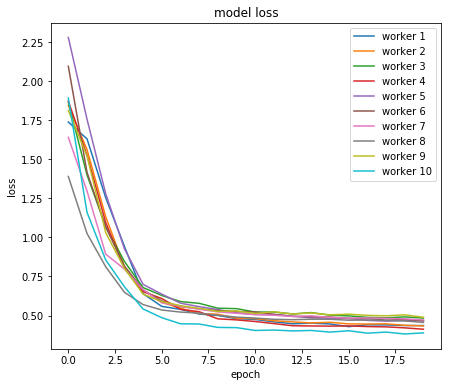

In [83]:
# plotting the metrics
fig = plt.figure()
plt.subplot(1,1,1)
plt.plot(loss[0,:])
plt.plot(loss[1,:])
plt.plot(loss[2,:])
plt.plot(loss[3,:])
plt.plot(loss[4,:])
plt.plot(loss[5,:])
plt.plot(loss[6,:])
plt.plot(loss[7,:])
plt.plot(loss[8,:])
plt.plot(loss[9,:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['worker 1', 'worker 2', 'worker 3', 'worker 4', 'worker 5', 'worker 6'\
           , 'worker 7', 'worker 8', 'worker 9', 'worker 10'], loc='upper right')
plt.show()